# Project：Use Linear Regression to Predict Housing prices

## Analysis Objectives

Based on the existing house sale prices and the attributes of those houses, perform a linear regression analysis. Use the resulting linear regression model to predict the price of the following house with unknown sale price based on its attributes:

Area: 6500 square feet, 4 bedrooms, 2 bathrooms, 2 stories, not located on the main road, no guest room, with basement, has water heater, no air conditioning, 2 parking spaces, located in the city's preferred community, basic decoration.

## Introduction

The dataset `house_price.csv` records the transaction prices of over 500 houses, along with related attribute information such as house area, number of bedrooms, number of bathrooms, number of stories, whether it is located on the main road, whether it has a guest room, and more.

The columns in the `house_price.csv` dataset are as follows:

- `price`: The sale price of the house
- `area`: The area of the house, in square feet
- `bedrooms`: The number of bedrooms
- `bathrooms`: The number of bathrooms
- `stories`: The number of stories
- `mainroad`: Whether the house is located on the main road
  - `yes`
  - `no`
- `guestroom`: Whether the house has a guest room
  - `yes`
  - `no`
- `basement`: Whether the house has a basement
  - `yes`
  - `no`
- `hotwaterheating`: Whether the house has a water heater
  - `yes`
  - `no`
- `airconditioning`: Whether the house has air conditioning
  - `yes`
  - `no`
- `parking`: The capacity of the garage, in terms of the number of cars
- `prefarea`: Whether the house is located in the city's preferred community
  - `yes`
  - `no`
- `furnishingstatus`: The furnishing status of the house.
  - `furnished`: Fully furnished
  - `semi-furnished`: Partially furnished
  - `unfurnished`: Unfurnished

## Read the Data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the necessary libraries for data analysis and use Pandas' `read_csv` function to parse the contents of the raw data file `house_price.csv`into a DataFrame assigned to the variable `original_house_price`.

In [59]:
original_house_price = pd.read_csv("house_price.csv")
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Evaluation and Cleaning

The step will focus on two main aspects: structure and content, addressing tidiness and cleanliness.
Structural issues pertain to data that does not adhere to the principles of "each variable as a column, each observation as a row, and each type of observational unit forms a table."
Content issues include missing data, duplicate data, invalid data, and other data quality concerns.

To distinguish between cleaned and original data, we will create a new variable `cleaned_house_price`, which will be a copy of `original_house_price`. Subsequent cleaning steps will be applied to `cleaned_house_price`

In [60]:
cleaned_house_price = original_house_price.copy()

### Data Tidiness

In [61]:
cleaned_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


From examining the first 10 rows of the data, the data conforms to the principle of "each variable as a column, each observation as a row, and each type of observational unit as a table," thus there are no structural issues.

### Data Cleanliness

Use the info method to get a general understanding of the data content.

In [62]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Based on the output, the `cleaned_house_price` dataset has 545 observations, and there are no missing values in any variables.
In terms of data types, we know that `mainroad` (whether it is on the main road), `guestroom` (whether there is a guest room), `basement` (whether there is a basement), `hotwaterheating` (whether there is a water heater), `airconditioning` (whether there is air conditioning), `prefarea` (whether it is in the preferred area of the city), and `furnishingstatus` (furnishing status) are all categorical data. These variables can be converted to the `Category` data type.

In [63]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

In [64]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### Handling Missing Data

From the output of the `info` method, it appears that `cleaned_house_price` does not have any missing values. Therefore, there is no need to handle missing data.

#### Handling Duplicate Data

Based on the meanings and content of the variables in the data, since variable duplication is allowed, we do not need to check for duplicate values in this dataset.

#### Handling Inconsistent Data

Inconsistent data may exist across all categorical variables. We need to check if different values actually refer to the same target.

In [65]:
cleaned_house_price["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [66]:
cleaned_house_price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [67]:
cleaned_house_price["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [68]:
cleaned_house_price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [69]:
cleaned_house_price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [70]:
cleaned_house_price["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [71]:
cleaned_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

Based on the output above, there are no inconsistent data issues detected.

#### Handling Invalid or Erroneous Data¶

Use the `describe` method of the DataFrame to quickly understand the statistical information of numerical data.

In [72]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


From the above statistical information, there are no unrealistic values present in `cleaned_house_price`

## Exploring the Data

Before proceeding with linear regression analysis, we can first use data visualization to explore the distribution of numerical variables and identify variables that correlate with house prices. This will provide direction for further analysis.

In [73]:
sns.set_palette("PiYG")

### The distribution of house prices

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


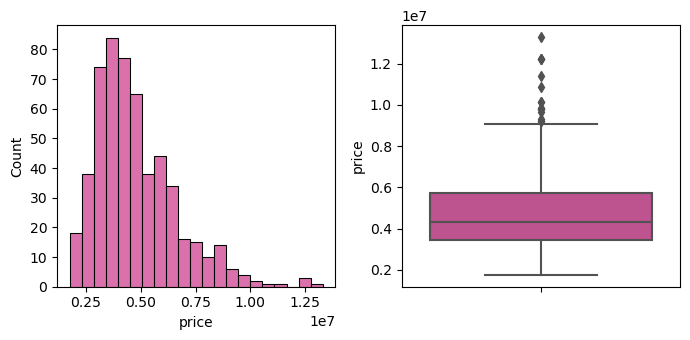

In [76]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price['price'], ax=axes[0])
sns.boxplot(cleaned_house_price, y='price', ax=axes[1])
plt.show()

The prices are right-skewed, indicating that the majority of houses in the dataset have moderate prices, but there are some very high-priced outliers that skew the mean upwards.

### The distribution of area

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


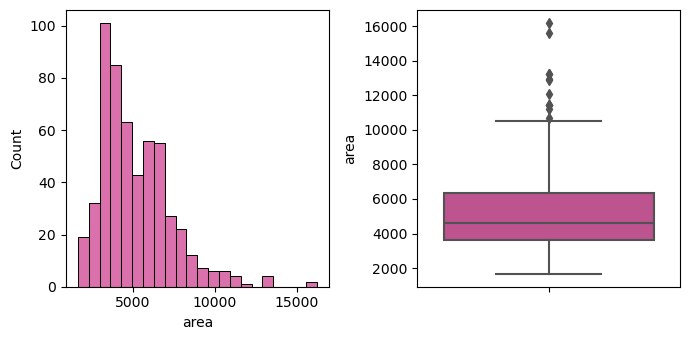

In [77]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='area', ax=axes[0])
sns.boxplot(cleaned_house_price, y='area', ax=axes[1])
plt.show()

The distribution of area is similar to that of house prices, also exhibiting a right-skewed distribution.

### The relationship between house price and area

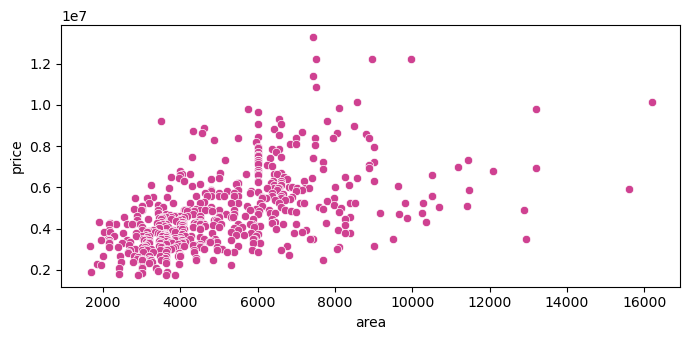

In [78]:
sns.scatterplot(cleaned_house_price, x='area', y='price')
plt.show()

From the scatter plot, we can roughly observe some positive correlation, but the strength of this relationship needs to be further assessed through calculating the correlation coefficient.

### The number of bedrooms and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


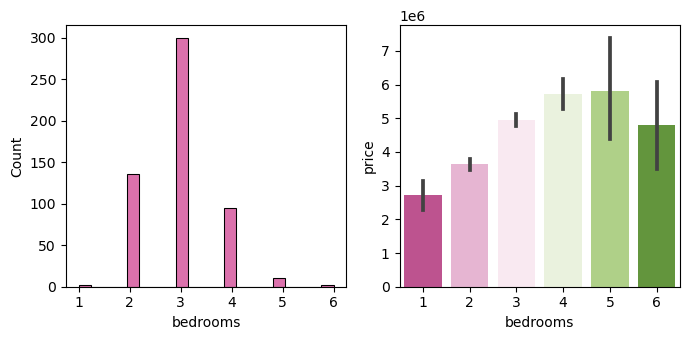

In [79]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='bedrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bedrooms', y='price', ax=axes[1])
plt.show()

In this dataset, the number of bedrooms ranges from 1 to 6, with the majority of houses having 2 to 4 bedrooms.
From the bar chart showing the average house price by number of bedrooms, we observe that houses with more bedrooms generally have higher prices when the number of bedrooms is less than 5. However, once the number of bedrooms exceeds 5, the prices do not necessarily increase correspondingly.

### The number of bathrooms and house price

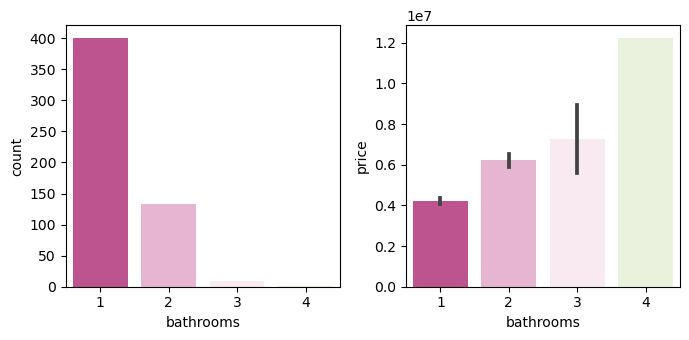

In [83]:
figure, axes = plt.subplots(1, 2)
sns.countplot(cleaned_house_price, x='bathrooms', ax=axes[0])
sns.barplot(cleaned_house_price, x='bathrooms', y='price', ax=axes[1])
plt.show()

In the dataset, houses have between 1 and 4 bathrooms, with the majority having 1 bathroom.
From the bar chart depicting the average house price by number of bathrooms, we observe that houses with more bathrooms generally have higher prices.

### The number of storeies and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


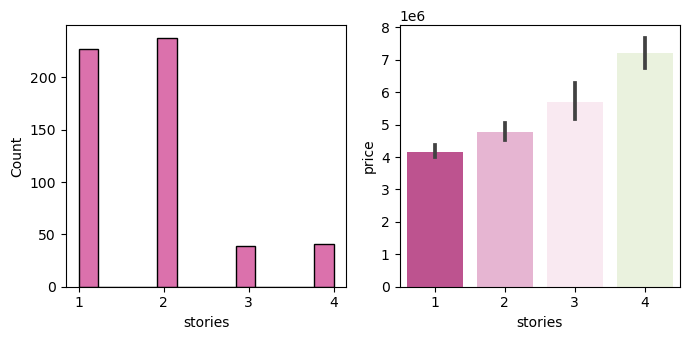

In [84]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='stories', ax=axes[0])
sns.barplot(cleaned_house_price, x='stories', y='price', ax=axes[1])
plt.show()

In this dataset, houses have between 1 and 4 stories, with the majority having 1 or 2 floors.
From the bar chart showing the average house price by number of stories, we observe that houses with more stories generally have higher prices.

### The number of parking spaces and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


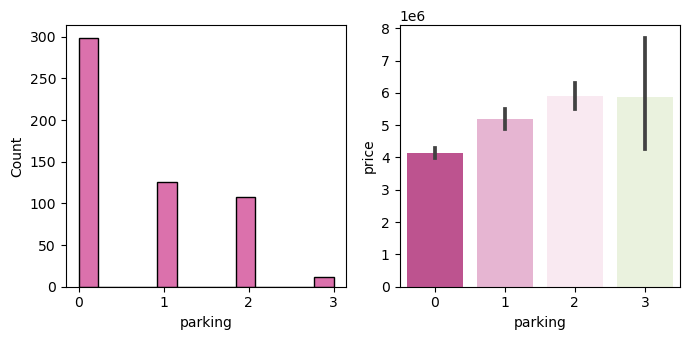

In [85]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_house_price, x='parking', ax=axes[0])
sns.barplot(cleaned_house_price, x='parking', y='price', ax=axes[1])
plt.show()

In this dataset, houses have between 0 and 3 parking spaces, with the most common being houses without a parking space, followed by those with 1 and 2 spaces.
From the bar chart depicting the average house price by number of parking spaces, we observe that houses with more parking spaces generally have higher prices. However, once the number of parking spaces exceeds 2, the prices do not necessarily increase correspondingly.

### The location on the main road and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


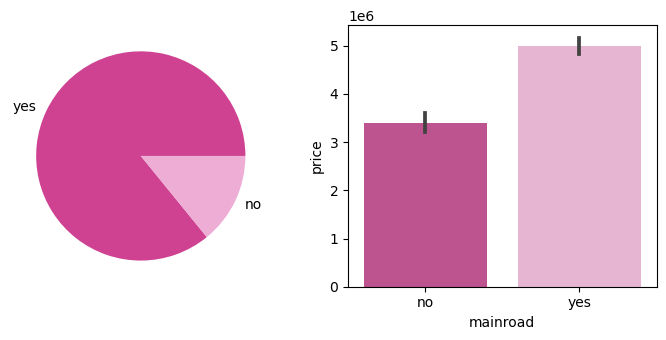

In [86]:
figure, axes = plt.subplots(1, 2)
mainroad_count = cleaned_house_price['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(cleaned_house_price, x='mainroad', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses are located on the main road.
From the bar chart depicting the average house price by location on the main road, we observe that houses located on the main road generally have higher prices.

### The presence of a guest room and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


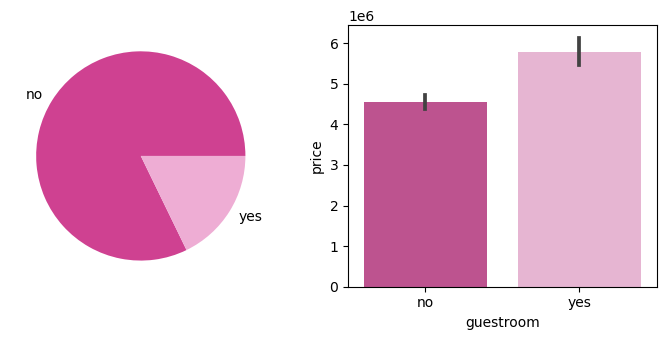

In [87]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label)
sns.barplot(cleaned_house_price, x='guestroom', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses do not have a guest room.
From the bar chart depicting the average house price by the presence of a guest room, we observe that houses with a guest room generally have higher prices.

### The presence of a basement and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


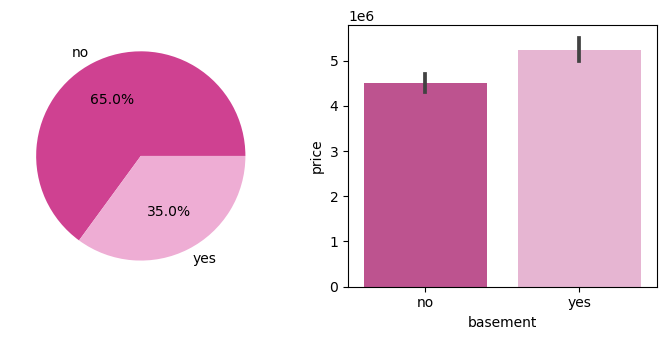

In [91]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label, autopct='%.1f%%')
sns.barplot(cleaned_house_price, x='basement', y='price', ax=axes[1])
plt.show()

In this dataset, more houses do not have a basement.
From the bar chart depicting the average house price by the presence of a basement, we observe that houses with a basement generally have higher prices.

### The presence of hot water heating and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


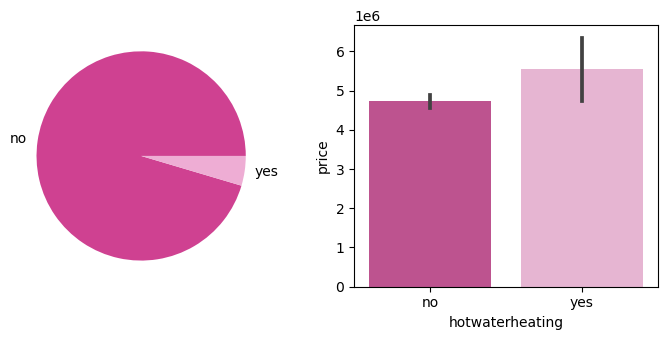

In [92]:
figure, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label)
sns.barplot(cleaned_house_price, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

In this dataset, the vast majority of houses do not have hot water heating.
From the bar chart depicting the average house price by the presence of hot water heating, we observe that houses with hot water heating generally have higher prices.

### The presence of air conditioning and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


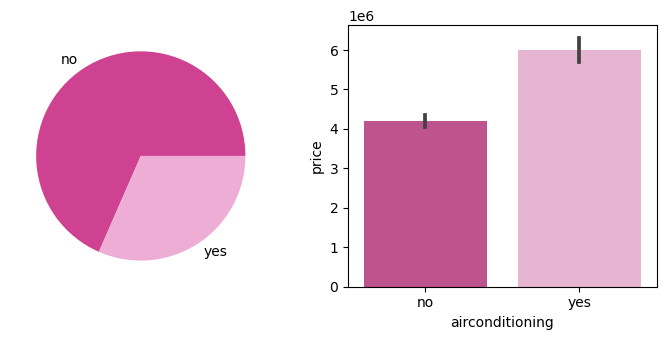

In [93]:
figure, axes = plt.subplots(1, 2)
airconditioning_count = cleaned_house_price['airconditioning'].value_counts()
airconditioning_label = hotwaterheating_count.index
axes[0].pie(airconditioning_count, labels=airconditioning_label)
sns.barplot(cleaned_house_price, x='airconditioning', y='price', ax=axes[1])
plt.show()

In this dataset, more houses do not have air conditioning.
From the bar chart depicting the average house price by the presence of air conditioning, we observe that houses with air conditioning generally have higher prices.

### Whether the house is located in a preferred city community and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


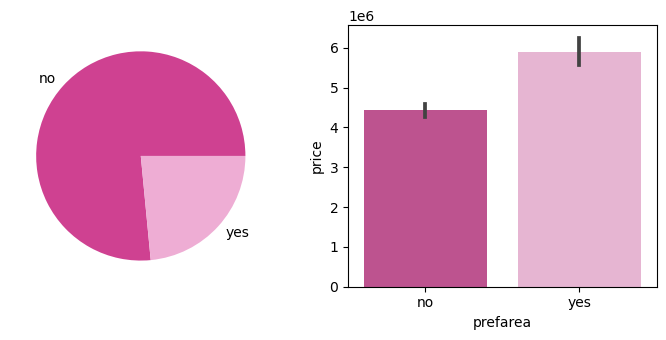

In [94]:
figure, axes = plt.subplots(1, 2)
prefarea_count = cleaned_house_price['prefarea'].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count, labels=prefarea_label)
sns.barplot(cleaned_house_price, x='prefarea', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses are not located in the preferred city community.
From the bar chart depicting the average house price by whether it is in the preferred city community, we observe that houses in the preferred city community generally have higher prices.

### The furnishing status and house price

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


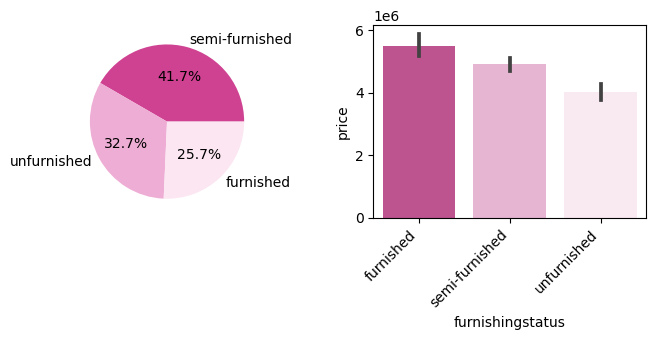

In [96]:
figure, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label, autopct='%.1f%%')
sns.barplot(cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45 , horizontalalignment='right')
plt.show()

In this dataset, there are more houses categorized as semi-furnished and unfurnished, with approximately a quarter of the houses being fully furnished.
From the bar chart depicting the average house price by furnishing status, we observe that fully furnished houses have higher prices compared to semi-furnished houses, and semi-furnished houses have higher prices compared to unfurnished houses.

## Data Analysis

We will use the data from `cleaned_house_price` to perform linear regression analysis. The goal is to develop a mathematical model that predicts house prices based on various attributes of the house.
First, we'll import the necessary modules for linear regression.

In [97]:
import statsmodels.api as sm

Create a new DataFrame `lr_house_price` to serve as the dataset for our linear regression analysis.
This separation from `cleaned_house_price` is because before conducting regression analysis, we may need to prepare the data further, such as introducing dummy variables. These operations can be performed on `lr_house_price`.

In [99]:
cleaned_house_price.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [100]:
lr_house_price = cleaned_house_price.copy()

Since the data includes categorical variables, we cannot directly build a linear regression model. We need to introduce dummy variables, which represent each category with 0s and 1s indicating its presence or absence.

In [101]:
lr_house_price = pd.get_dummies(lr_house_price, drop_first=True, columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'], dtype=int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


Next, separate the dependent variable and independent variables.
The dependent variable is `price` because our objective in linear regression is to develop a model that predicts the sale price based on other variables that might influence house prices.

In [102]:
y = lr_house_price['price']

We can include all variables except for price as independent variables, but we need to examine their correlations. High correlations among some variables can lead to multicollinearity.

In [103]:
X = lr_house_price.drop('price', axis=1)

Typically, we consider correlations with absolute values greater than 0.8 as potentially leading to severe multicollinearity. Therefore, when checking correlations, we look for values whose absolute values exceed 0.8

In [104]:
X.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


From the output above, the absolute values of the correlation coefficients between different variables are all less than or equal to 0.8.

Next, add an intercept to the linear equation of the model.

In [105]:
X = sm.add_constant(X)
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


Call the OLS function to use ordinary least squares method and obtain the parameter values of the linear regression model.

In [106]:
result = sm.OLS(y, X).fit()

To examine the model results, we use the `summary` method to obtain summary information.

In [107]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          9.07e-123
Time:                        23:52:31   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we set the significance level at 0.05, the p-values from the above results indicate that the model suggests the following factors do not have a significant impact on house prices: number of bedrooms and whether the house is semi-furnished. Additionally, the p-value for the constant (representing the intercept of the linear equation) is also large, indicating it does not have a significant effect.
So we can remove these variables and proceed to build the linear regression model again.

In [108]:
X = X.drop(columns = ['const', 'bedrooms', 'furnishingstatus_semi-furnished'])

In [109]:
result = sm.OLS(y, X).fit()

In [110]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Mon, 24 Jun 2024   Prob (F-statistic):                        0.00
Time:                        23:54:20   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It can be observed that by removing the independent variables with larger p-values from the linear regression model, the R-squared value has increased from 0.682 to 0.957. This improvement indicates that the model's fit to the existing data has been enhanced.

Based on the coefficients of each independent variable in the linear regression equation, the model predicts that an increase (or presence) of the following factors will significantly increase house prices: house area, number of bathrooms, number of storeies, parking spaces, being located on the main road, having a guest room, having a basement, having a water heater, having air conditioning, and being located in the preferred city community.
The linear regression model predicts that an increase (or presence) of the following factors will significantly decrease house prices: house being unfurnished.

In [111]:
# Information about the house to predict house price:
# Area of 6500 square feet, 4 bedrooms, 2 bathrooms, 2 storeies, not located on the main road, no guest room, with basement, 
# with water heater, without air conditioning, 2 parking spaces, located in the preferred city community, semi-furnished

In [112]:
price_to_predict = pd.DataFrame({'area': [5600], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


We need to convert the data type of categorical variables to `Category`, and use the `categories` parameter to ensure that the program knows all possible categorical values. This is necessary because the prediction data may not contain categories that are present in the original dataset. We want to ensure that when creating dummy variables, all possible categories are accounted for and no categories are missed.

In [113]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

In [114]:
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


Next, introduce dummy variables for the categorical variables.

In [115]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [116]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

Next,use the `predict` method of the linear regression model to obtain predicted prices.

In [117]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64

The predicted price from the linear regression model is 7,071,927